In [1]:
#4 Regression Analysis-Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Car_Purchasing_Dataa.csv")
# Dropping irrelevant columns from the dataset
df=df.drop(['Customer Name','Customer e-mail','Country','Gender','Age','Credit Card Debt'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Annual Salary        500 non-null    float64
 1   Net Worth            478 non-null    float64
 2   Car Purchase Amount  482 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
# Handling missing values in the 'Car Purchase Amount' column using mean imputation
from sklearn.impute import SimpleImputer

In [5]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Car Purchase Amount']=imp.fit_transform(df["Car Purchase Amount"].values.reshape(-1,1))

<Axes: >

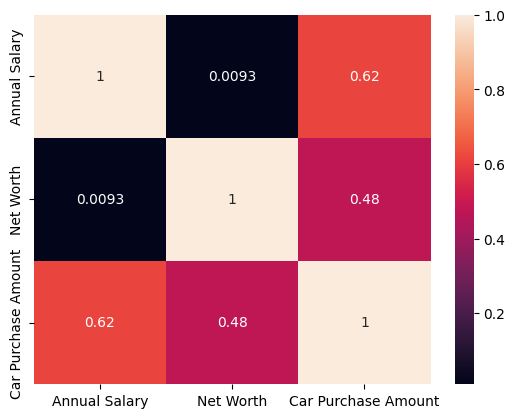

In [6]:
# Visualizing the correlation between the variables in the dataset
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Car Purchase Amount')

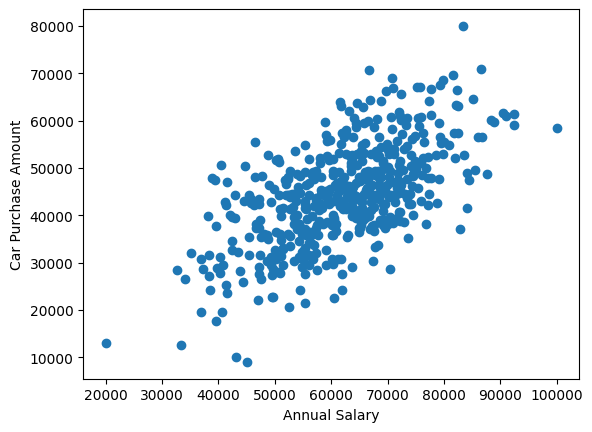

In [7]:
# Creating a scatter plot to visualize the relationship between 'Annual Salary' and 'Car Purchase Amount'
plt.scatter(df["Annual Salary"],df["Car Purchase Amount"])
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")

In [8]:
# Extracting the independent and dependent variables from the dataset
X=df.iloc[:,0].values
X=X.reshape(-1,1)
y=df.iloc[:,2].values
y=y.reshape(-1,1)

In [9]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [10]:
# Fitting a linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)

In [11]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(mse)

-64790919.72834891

In [15]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,prediction)*100
r2

37.79358131561129

Text(0, 0.5, 'Car Purchase Amount')

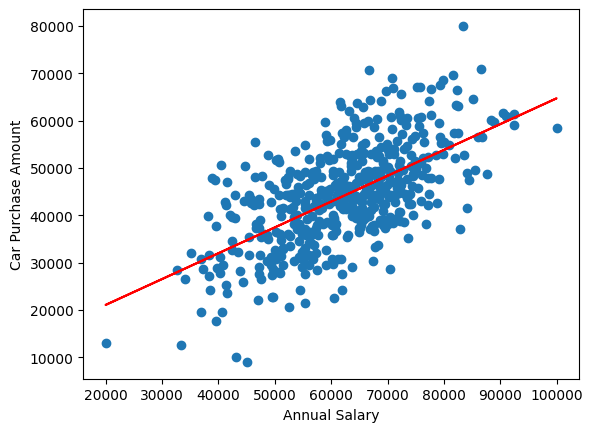

In [13]:
# Making predictions using the test set and plotting the regression line
lr.predict(X_test)
plt.scatter(df['Annual Salary'],df['Car Purchase Amount'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')